# Palmer Penguins Classification using PyCaret 2.0
Last Update: 06/08/2020

PyCaret Version: 2.0

Author: [Richard Cornelius Suwandi](https://github.com/richardcsuwandi)

The goal of this project is to build a binary classification model to predict the sex of Palmer Penguins using PyCaret 2.0.

# About PyCaret
[PyCaret](https://pycaret.org) is an open-source, low-code machine learning library in Python that allows you to prepare and deploy your model with few lines of code.

# Installation
Installing PyCaret is very easy and takes only a few minutes. If you're using Azure notebooks or Google Colab, simply run the following code to install PyCaret.

In [ ]:
# Install PyCaret 2.0
!pip install pycaret==2.0

# Importing the Libraries

In [ ]:
# Import pandas for data loading and manipulation
import pandas as pd

# To render interactive plots in Google Colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


# Loading the Data
The data used in this project is the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/), which is released as an R package by [Allison Horst](https://www.allisonhorst.com/).

The dataset consists of 4 numerical features:
- Bill length (mm)
- Bill depth (mm)
- Flipper length (mm)
- Body mass (g)

And 2 categorical features:
- Sex (Male/Female)
- Island (Biscoe/Dream/Torgersen)

You can find the cleaned CSV file in my [GitHub](https://github.com/richardcsuwandi/datasets/blob/master/penguins.csv).

In [ ]:
# Load the data
data = pd.read_csv('penguins.csv')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,Male
1,Adelie,Torgersen,39.5,17.4,186,3800,Female
2,Adelie,Torgersen,40.3,18.0,195,3250,Female
3,Adelie,Torgersen,36.7,19.3,193,3450,Female
4,Adelie,Torgersen,39.3,20.6,190,3650,Male


In [ ]:
# View the data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


# Setup
To start with PyCaret, the first step is to import all methods and attributes from PyCaret’s classification class.

In [ ]:
from pycaret.classification import *

PyCaret workflow always starts with `setup` function which prepares the environment for the entire machine learning pipeline. Thus, `setup` must be executed before any other function.

In [ ]:
clf = setup(
    data=data, 
    target='sex',
    train_size=0.8,
    normalize=True,
    session_id=123
)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"Female: 0, Male: 1"
3,Original Data,"(333, 7)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


As you can see above, the `setup` function will handle the data preprocessing steps. It also splits the data into training and test sets.

# Compare Models
Once the `setup` is executed, we can use `compare_models` to briefly evaluate the performance of all the models in the model library of PyCaret. This function train all the models available in the model library and scores them using Stratified Cross Validation. The output prints a score grid with Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC (averaged accross folds), determined by fold parameter.

In [ ]:
# Compare and sort models by AUC
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9209,0.9720,0.9176,0.9266,0.9194,0.8420,0.8466,0.2486
1,Linear Discriminant Analysis,0.9137,0.9710,0.9027,0.9235,0.9106,0.8274,0.8312,0.0068
2,CatBoost Classifier,0.8981,0.9705,0.9093,0.8919,0.8976,0.7961,0.8015,0.9557
3,Extreme Gradient Boosting,0.9135,0.9689,0.9324,0.9016,0.9152,0.8268,0.8307,0.0253
4,Logistic Regression,0.9023,0.9686,0.9253,0.8879,0.9029,0.8045,0.8110,0.0163
5,K Neighbors Classifier,0.8981,0.9655,0.9093,0.8953,0.8993,0.7960,0.8013,0.0042
6,Light Gradient Boosting Machine,0.8984,0.9645,0.9104,0.8958,0.8998,0.7966,0.8033,0.0229
7,Random Forest Classifier,0.8986,0.9633,0.9022,0.8995,0.8982,0.7969,0.8019,0.1125
8,Gradient Boosting Classifier,0.8870,0.9631,0.8863,0.8896,0.8846,0.7738,0.7794,0.0878
9,Ada Boost Classifier,0.8875,0.9513,0.8874,0.8933,0.8871,0.7743,0.7800,0.0837


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

# Create Model
The next step is to create a model with selected algorithm using `create_model` function. We just need to pass in the abbreviation of the model. You can check the docstring of the function to look for abbreviations.

In [ ]:
# Get the ID of the models
help(create_model)

Help on function create_model in module pycaret.classification:

create_model(estimator=None, ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=True, system=True, **kwargs)
    Description:
    ------------
    This function creates a model and scores it using Stratified Cross Validation. 
    The output prints a score grid that shows Accuracy, AUC, Recall, Precision, 
    F1, Kappa and MCC by fold (default = 10 Fold). 
    
    This function returns a trained model object. 
    
    setup() function must be called before using create_model()
    
        Example
        -------
        from pycaret.datasets import get_data
        juice = get_data('juice')
        experiment_name = setup(data = juice,  target = 'Purchase')
        
        lr = create_model('lr')
    
        This will create a trained Logistic Regression model.
    
    Parameters
    ----------
    estimator : string / object, default = None
    
    Enter ID of the estimators available i

In [ ]:
# Create an Extra Trees Classifier	
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9670,0.9231,0.8571,0.8889,0.7781,0.7802
1,0.9630,0.9945,1.0000,0.9286,0.9630,0.9260,0.9286
2,0.9630,1.0000,1.0000,0.9333,0.9655,0.9256,0.9282
3,0.9259,0.9615,1.0000,0.8750,0.9333,0.8508,0.8605
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8148,0.9451,0.7143,0.9091,0.8000,0.6322,0.6481
6,0.8846,0.9290,0.8462,0.9167,0.8800,0.7692,0.7715
7,0.9231,0.9941,0.9231,0.9231,0.9231,0.8462,0.8462
8,0.9231,0.9763,0.9231,0.9231,0.9231,0.8462,0.8462
9,0.9231,0.9527,0.8462,1.0000,0.9167,0.8462,0.8563


In [ ]:
# Tune the classifier	
tuned_et = tune_model(et, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9259,0.9670,0.9231,0.9231,0.9231,0.8516,0.8516
1,0.9630,1.0000,1.0000,0.9286,0.9630,0.9260,0.9286
2,0.9630,1.0000,1.0000,0.9333,0.9655,0.9256,0.9282
3,0.9259,0.9615,1.0000,0.8750,0.9333,0.8508,0.8605
4,0.9630,0.9973,0.9286,1.0000,0.9630,0.9260,0.9286
5,0.8519,0.9451,0.7857,0.9167,0.8462,0.7049,0.7127
6,0.8846,0.9349,0.8462,0.9167,0.8800,0.7692,0.7715
7,0.9231,0.9941,0.9231,0.9231,0.9231,0.8462,0.8462
8,0.9231,0.9763,0.9231,0.9231,0.9231,0.8462,0.8462
9,0.9231,0.9675,0.8462,1.0000,0.9167,0.8462,0.8563


In [ ]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=60, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=175, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

# Plot the Model
The `plot_model` function provides tools to further analyze the performance of a model. It takes the model as input and returns a specified plot. Let’s go over some examples.

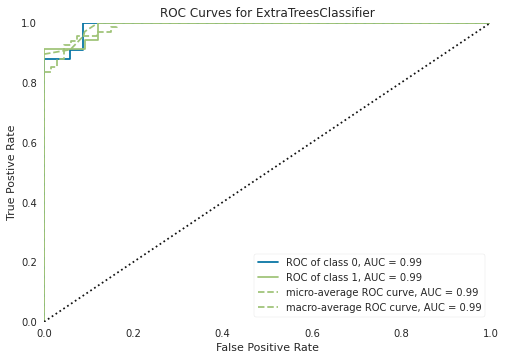

In [ ]:
plot_model(tuned_et)

As we can see, The AUC for each classes is nearly perfect: 0.99.

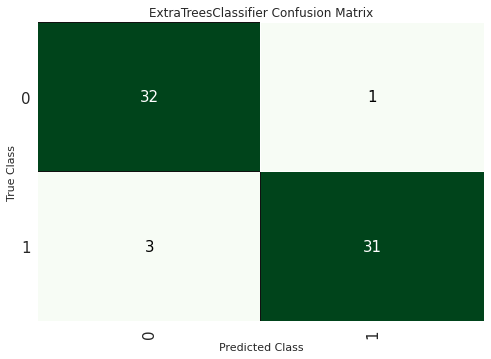

In [ ]:
plot_model(tuned_et, plot = 'confusion_matrix')

The Confusion Matrix also shows our model does a great job in classifiying the two classes.

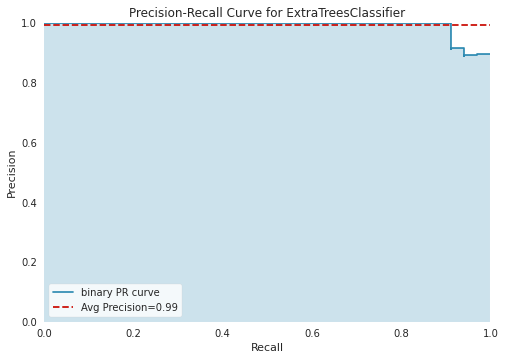

In [ ]:
# Precision Recall Curve
plot_model(tuned_et, plot = 'pr')

The PR curve got an average precision around 0.99, which is almost perfect.

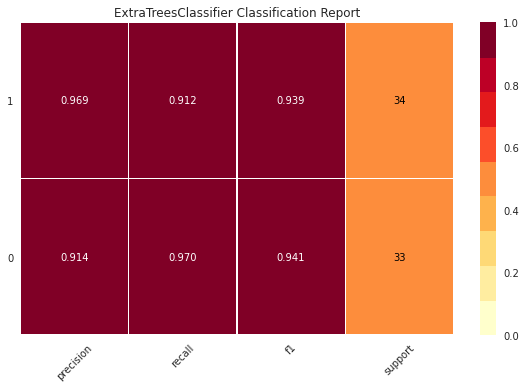

In [ ]:
plot_model(tuned_et, plot = 'class_report')

The model has done a great work on the metrics for both of the classes, having a F1 score of roughly 94%.

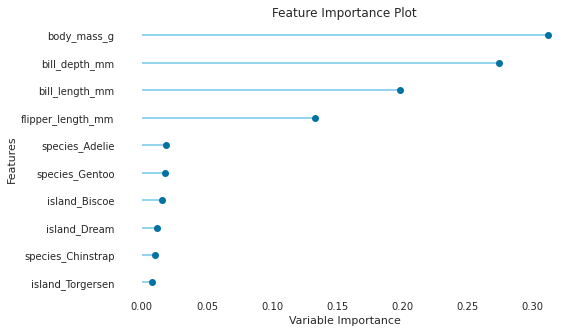

In [ ]:
plot_model(tuned_et, plot='feature')

The Feature Importance plot above clearly shows us the how each features affect the outcome of our classes. The body mass and the bill size of the penguins are the most important features in our dataset. This agrees with our intuition that male penguins tend to be heavier and have bigger bill sizes.

# Evaluate Model
Alternatively, we can use the `evaluate_model` function that will create a user interface with all available plots for a given model.

In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Interpret the Model
The `interpret_model` function will return an interpretation plot based on the test / hold-out set. It only supports tree based algorithms. This function is implemented based on the [SHAP (SHapley Additive exPlanations)](https://shap.readthedocs.io/en/latest/), which is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations.

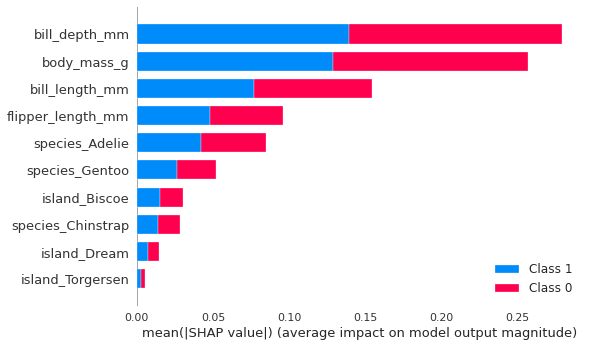

In [ ]:
# Interpret the model using SHAP values
interpret_model(tuned_et)

# Predict and Finalize model
The test consists of remaining 20% of data that PyCaret automatically split on the setup, it's important to see that the model is not overfitting.

In [ ]:
# Make predictions on the test set
predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9403,0.9902,0.9118,0.9688,0.9394,0.8807,0.8822


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex,Label,Score
0,0.221082,-0.287276,-0.712196,-1.190361,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0514
1,0.019633,1.289308,-0.354918,0.239977,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9771
2,-0.584712,0.628159,-0.426373,-0.381909,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0.8971
3,0.678920,-1.100997,1.074194,0.675297,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.3771
4,-0.987609,-0.083846,-0.926562,-1.625681,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,-0.529772,0.729875,-0.855107,-1.097078,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0.3429
63,0.221082,-0.388992,1.574384,2.167824,0.0,0.0,1.0,1.0,0.0,0.0,1,1,0.9486
64,-0.419891,-1.253570,0.645461,0.613109,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.0057
65,0.862055,-0.744994,0.502550,1.421560,0.0,0.0,1.0,1.0,0.0,0.0,1,1,0.8686


In [ ]:
# Finalize the model
finalize_model(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=60, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=175, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

PyCaret allows us to save all the pipeline experiment so that the model is ready to be deployed. It's recommended to include the date of the experiment in the file name.

In [ ]:
# Save the model
save_model(tuned_et, 'et_model_05082020')

Transformation Pipeline and Model Succesfully Saved


If you have any queries or suggestions, feel free to contact me on [LinkedIn](https://www.linkedin.com/in/richardcsuwandi/)